# 3.2. C

These questions will be examined.

## 3.2.1. Cr

|                      |      US     |     JP    |
|:--------------------:|:-----------:|:---------:|
|    Representative    | S2A, Timken |  NSK, NTN |
|     Totalization     | Integration $ \int $ ![Asset1](Asset1.svg)| Summation $ \sum $ ![Asset2](Asset2.svg)|
| contact condition |  ellipse       |   line (approximate)     |
| friction coefficient | Simple Coulomb <br> ![Coulomb](Coulomb.jpg)| Smooth Coulomb　<br> ![Smooth_Coulomb](Smooth_Coulomb.jpg)  |
|         Merit        |             |           |

In [5]:
%config InlineBackend.figure_format = "svg"


In [6]:
import numpy as np
from matplotlib import pyplot as plt


In [7]:
import sys
import pathlib
import os
sys.path.append(str(pathlib.Path(os.path.abspath('')).resolve().parent.parent))

from _9_Mechanics.Spiral import Spiral
from _9_Mechanics.Tribology import Tribology

TB = Tribology()


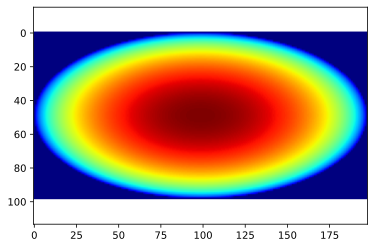

In [8]:
n = 99
x = np.linspace(-1.0, 1.0, 2 * n)
y = np.linspace(-1.0, 1.0, n)
x_, y_ = np.meshgrid(x, y)
P = 1.0 - np.square(x_) - np.square(y_)
P[P<0.0] = 0.0
P = np.sqrt(P)

plt.imshow(P, cmap=plt.cm.jet)
plt.axis('equal')
plt.show()


![NTN1](NTN1.jpg)
![NTN2](NTN2.jpg)


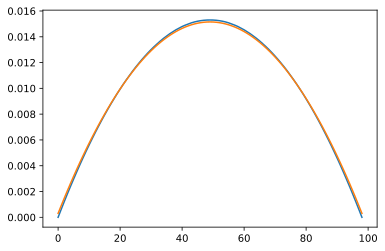

In [9]:
SFR = TB.SliceForceRatio(n)

plt.plot(P.sum(1) / P.sum())
plt.plot(SFR)


$$
P(x, y) = P_{\text{max}} \sqrt{1 - \frac{x^2}{a^2} - \frac{y^2}{b^2}}
$$
_
$$
\left( -a \leq x \leq a, -b \leq y \leq b \right)
$$
_
$$
x = ar \cos{\theta}, y = br \sin{\theta}
$$
_
$$
\left( 0 \leq r \leq 1, 0 \leq \theta \leq 2\pi \right)
$$
_
$$
P(r, \theta) = P_{\text{max}} \sqrt{1 - r^2}
$$


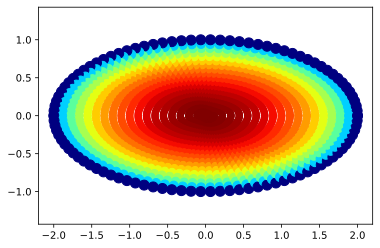

In [15]:
r = np.linspace(0.0, 1.0, int(n/5))
t = np.linspace(0.0, 2 * np.pi, n)

r_, t_ = np.meshgrid(r, t)
x_ = r_ * np.cos(t_) * 2
y_ = r_ * np.sin(t_)
F_ = np.sqrt(1 - np.square(r_))

plt.scatter(x_, y_, c=F_, cmap=plt.cm.jet, s=100*(1-F_*0.6))
plt.axis('equal')
plt.show()


$$
\begin{eqnarray*}
\Delta F &=& P \cdot \Delta S \\
&=& P(r, \theta) \cdot ab \cdot r \Delta \theta \Delta r \\
&=& P_{\text{max}} ab \cdot r \sqrt{1 - r^2} \cdot \Delta \theta \Delta r
\end{eqnarray*}
$$



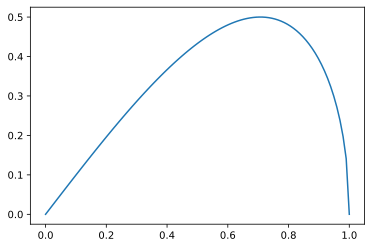

In [16]:
r = np.linspace(0, 1, n)
plt.plot(r, r * np.sqrt(1 - np.square(r)))